PROBLEM STATEMENT

You have been provided with a dataset containing key demographic and financial details of bank customers. This dataset includes fields such as customer information (e.g., Name, Customer ID), financial performance indicators (e.g., Credit Score, Balance), and customer engagement metrics (e.g., Tenure, Number of Products, Is Active Member). Additionally, it includes whether the customer has exited the bank or remains active. Your goal is to analyse the dataset to gain insights into customer behavior, financial standing, and engagement patterns.

OBJECTIVES


In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data viz library
import seaborn as sb # data viz library

In [227]:
account_df =  pd.read_csv('datasource/Account_Info.csv', sep=',')
customer_df = pd.read_csv('datasource/Customer_Info.csv')

In [228]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€ 0.00,1,Yes,2,Yes,1
1,15634602,€ 0.00,1,Yes,2,Yes,1
2,15647311,"€ 83,807.86",1,Yes,1,Yes,0
3,15619304,"€ 159,660.80",3,No,8,No,1
4,15701354,€ 0.00,2,No,1,No,0


In [222]:
unnamed_cols = [col for col in df.columns if 'Unnamed:' in col]
df = df.drop(columns=unnamed_cols)

In [229]:
account_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€ 0.00,1,Yes,2,Yes,1
1,15634602,€ 0.00,1,Yes,2,Yes,1
2,15647311,"€ 83,807.86",1,Yes,1,Yes,0
3,15619304,"€ 159,660.80",3,No,8,No,1
4,15701354,€ 0.00,2,No,1,No,0


In [230]:
account_df.tail()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
9997,15569892,"€ 57,369.61",1,Yes,10,Yes,0
9998,15584532,€ 0.00,1,Yes,7,Yes,1
9999,15682355,"€ 75,075.31",2,No,3,No,1
10000,15628319,"€ 130,142.79",1,No,4,No,0
10001,15628319,"€ 130,142.79",1,No,4,No,0


In [225]:
customer_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [231]:
customer_df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52
9999,15628319,Walker,792,French,Female,28.0,4,€38190.78
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78


In [232]:
account_df.columns

Index(['CustomerId', 'Balance', 'NumOfProducts', 'HasCrCard', 'Tenure',
       'IsActiveMember', 'Exited'],
      dtype='object')

In [233]:
customer_df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'EstimatedSalary'],
      dtype='object')

In [234]:
account_df.duplicated()

0        False
1         True
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001     True
Length: 10002, dtype: bool

In [235]:
account_df.drop_duplicates(inplace=True)

In [236]:
account_df

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€ 0.00,1,Yes,2,Yes,1
2,15647311,"€ 83,807.86",1,Yes,1,Yes,0
3,15619304,"€ 159,660.80",3,No,8,No,1
4,15701354,€ 0.00,2,No,1,No,0
5,15737888,"€ 125,510.82",1,Yes,2,Yes,0
...,...,...,...,...,...,...,...
9996,15606229,€ 0.00,2,No,5,No,0
9997,15569892,"€ 57,369.61",1,Yes,10,Yes,0
9998,15584532,€ 0.00,1,Yes,7,Yes,1
9999,15682355,"€ 75,075.31",2,No,3,No,1


In [237]:
customer_df.drop_duplicates(inplace=True)

In [238]:
customer_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1
...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52


In [239]:
comb_df = pd.merge(customer_df, account_df, on="CustomerId", how="inner")

In [240]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€ 0.00,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,"€ 83,807.86",1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,"€ 159,660.80",3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€ 0.00,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,"€ 125,510.82",1,Yes,2,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€ 0.00,2,No,5,No,0
9996,15569892,Johnstone,516,French,Male,35.0,10,€101699.77,"€ 57,369.61",1,Yes,10,Yes,0
9997,15584532,Liu,709,FRA,Female,36.0,7,€42085.58,€ 0.00,1,Yes,7,Yes,1
9998,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,"€ 75,075.31",2,No,3,No,1


In [242]:
comb_df.shape

(10000, 14)

In [243]:
customer_df.shape

(10000, 8)

In [244]:
account_df.shape

(10000, 7)

In [245]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure_x         10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  Tenure_y         10000 non-null  int64  
 12  IsActiveMember   10000 non-null  object 
 13  Exited           10000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [246]:
comb_df.loc[0:5]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€ 0.00,1,Yes,2,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,"€ 83,807.86",1,Yes,1,Yes,0
2,15619304,Onio,502,French,Female,42.0,8,€113931.57,"€ 159,660.80",3,No,8,No,1
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€ 0.00,2,No,1,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,"€ 125,510.82",1,Yes,2,Yes,0
5,15574012,Chu,645,Spain,Male,44.0,8,€149756.71,"€ 113,755.78",2,No,8,No,1


In [247]:
comb_df.loc[0:10, ['Surname', 'Age']]

,Surname,Age
0,Hargrave,42.0
1,Hill,41.0
2,Onio,42.0
3,Boni,39.0
4,Mitchell,43.0
5,Chu,44.0
6,Bartlett,50.0
7,Obinna,29.0
8,He,44.0
9,H?,27.0


In [252]:
comb_df['Surname'] = comb_df['Surname'].fillna('Unknown')

In [253]:
comb_df['Age'] = comb_df['Age'].fillna(comb_df['Age'].mean())

In [254]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure_x         10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  Tenure_y         10000 non-null  int64  
 12  IsActiveMember   10000 non-null  object 
 13  Exited           10000 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [72]:
comb_df.loc[0:10, ['Tenure_x', 'Tenure_y']]

,Tenure_x,Tenure_y
0,2,2
1,1,1
2,8,8
3,1,1
4,2,2
5,8,8
6,7,7
7,4,4
8,4,4
9,2,2


In [255]:
if 'Tenure_x' in comb_df.columns and 'Tenure_y' in comb_df.columns:
    same = (df['Tenure_x'] == df['Tenure_y']).all()

In [329]:
comb_df = df.drop(columns=['Tenure_y']).rename(columns={'Tenure_x': 'Tenure'})

In [330]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10004 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  float64
 8   Balance          10004 non-null  float64
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  int64  
 11  IsActiveMember   10004 non-null  int64  
 12  Exited           10004 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1016.2+ KB


In [331]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,0,0,1
10000,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0
10001,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0
10002,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0


In [332]:
comb_df.drop_duplicates()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,0,0,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.00,2,0,0,0
9997,15569892,Johnstone,516,French,Male,35.0,10,101699.77,57369.61,1,1,1,0
9998,15584532,Liu,709,FRA,Female,36.0,7,42085.58,0.00,1,1,1,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,0,0,1


In [333]:
df['Balance'] = df['Balance'].replace({',':''}, regex=True).astype(float)

In [334]:
comb_df.rename(columns = {
    'HasCrCard' : 'Credit Card',
    'IsActiveMember' : 'Active Member'
}, inplace=True)

In [335]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Credit Card,Active Member,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,0,0,1
10000,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0
10001,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0
10002,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0


In [336]:
comb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10004 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  float64
 8   Balance          10004 non-null  float64
 9   NumOfProducts    10004 non-null  int64  
 10  Credit Card      10004 non-null  int64  
 11  Active Member    10004 non-null  int64  
 12  Exited           10004 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1016.2+ KB


In [337]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Credit Card,Active Member,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,0,0,1
10000,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0
10001,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0
10002,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0


In [338]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Credit Card,Active Member,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,0,0,1
10000,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0
10001,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0
10002,15628319,Walker,792,French,Female,28.0,4,38190.78,130142.79,1,0,0,0


In [339]:
duplicates = comb_df[comb_df.duplicated(subset='CustomerId', keep=False)]
print("Number of duplicate rows based on CustomerId:", duplicates.shape[0])

Number of duplicate rows based on CustomerId: 6


In [340]:
comb_df.drop_duplicates(inplace=True)

In [341]:
comb_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Credit Card,Active Member,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,0,0,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,0,0,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.00,2,0,0,0
9997,15569892,Johnstone,516,French,Male,35.0,10,101699.77,57369.61,1,1,1,0
9998,15584532,Liu,709,FRA,Female,36.0,7,42085.58,0.00,1,1,1,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,0,0,1


In [279]:
comb_df['Age'] = df['Age'].fillna(df['Age'].mean())
comb_df['Surname'] = df['Surname'].fillna('NA')

In [280]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure Months    10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  Credit Card      10000 non-null  int64  
 11  Active Member    10000 non-null  int64  
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [342]:
for col in comb_df.select_dtypes(include='object').columns:
    print(f"--- {col} ---")
    print("Unique values:", comb_df[col].unique())
    print("Value counts:")
    print(comb_df[col].value_counts())
    print("\n")

--- Surname ---
Unique values: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Value counts:
Surname
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64


--- Geography ---
Unique values: ['FRA' 'Spain' 'French' 'France' 'Germany']
Value counts:
Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64


--- Gender ---
Unique values: ['Female' 'Male']
Value counts:
Gender
Male      5457
Female    4543
Name: count, dtype: int64




In [282]:
comb_df.shape

(10000, 13)

In [284]:
comb_df['Geography'] = comb_df['Geography'].replace({
    'FRA': 'France',
    'French': 'France'})

In [292]:
print(comb_df['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [343]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  Credit Card      10000 non-null  int64  
 11  Active Member    10000 non-null  int64  
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [344]:
comb_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Credit Card,Active Member,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.922076,5.012800,99762.195289,76485.889288,1.530200,0.515100,0.515100,0.203700
std,7.193619e+04,96.653299,10.487499,2.892174,60583.863580,62397.405202,0.581654,0.499797,0.499797,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,1.000000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,1.000000,1.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,1.000000,1.000000


In [305]:
comb_df['EstimatedSalary'] = comb_df['EstimatedSalary'].mask(comb_df['EstimatedSalary'] < 0, 0)

In [345]:
comb_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Credit Card,Active Member,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.922076,5.012800,99762.195289,76485.889288,1.530200,0.515100,0.515100,0.203700
std,7.193619e+04,96.653299,10.487499,2.892174,60583.863580,62397.405202,0.581654,0.499797,0.499797,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,1.000000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,1.000000,1.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,1.000000,1.000000


In [346]:
comb_df.to_csv('Bank Customer Analysis_cleaned.csv')

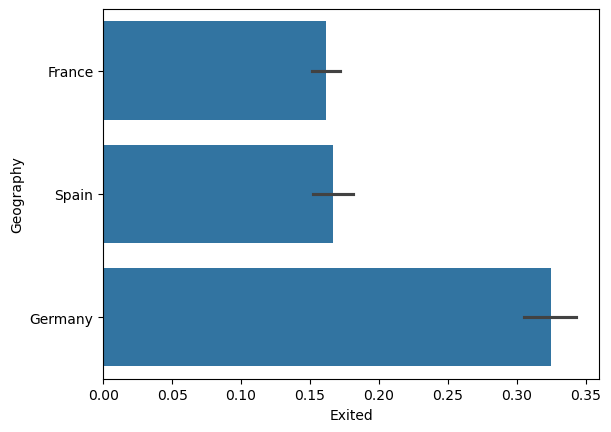

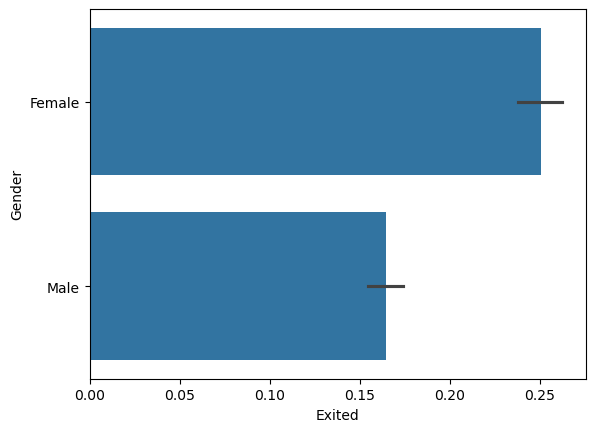

In [312]:
for col in comb_df.select_dtypes('object').columns[1:]:
    sb.barplot(data=comb_df, x='Exited', y=col)
    plt.show()

In [347]:
print(f"Rows: {comb_df.shape[0]}, Columns: {comb_df.shape[1]}")
print(comb_df.head())

Rows: 10000, Columns: 13
   CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0    15634602  Hargrave          619       FRA  Female  42.0       2   
2    15647311      Hill          608     Spain  Female  41.0       1   
3    15619304      Onio          502    French  Female  42.0       8   
4    15701354      Boni          699       FRA  Female  39.0       1   
5    15737888  Mitchell          850     Spain  Female  43.0       2   

   EstimatedSalary    Balance  NumOfProducts  Credit Card  Active Member  \
0        101348.88       0.00              1            1              1   
2        112542.58   83807.86              1            1              1   
3        113931.57  159660.80              3            0              0   
4         93826.63       0.00              2            0              0   
5         79084.10  125510.82              1            1              1   

   Exited  
0       1  
2       0  
3       1  
4       0  
5       0  


In [348]:
print(comb_df.describe())

         CustomerId   CreditScore           Age        Tenure  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean   1.569094e+07    650.528800     38.922076      5.012800   
std    7.193619e+04     96.653299     10.487499      2.892174   
min    1.556570e+07    350.000000     18.000000      0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   
75%    1.575323e+07    718.000000     44.000000      7.000000   
max    1.581569e+07    850.000000     92.000000     10.000000   

       EstimatedSalary        Balance  NumOfProducts   Credit Card  \
count     10000.000000   10000.000000   10000.000000  10000.000000   
mean      99762.195289   76485.889288       1.530200      0.515100   
std       60583.863580   62397.405202       0.581654      0.499797   
min     -999999.000000       0.000000       1.000000      0.000000   
25%       50910.677500       0.000000       1.000000      0.0000

In [352]:
comb_df.transpose()

,0,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
CustomerId,15634602,15647311,15619304,15701354,15737888,15574012,15592531,15656148,15792365,15592389,...,15798964,15769959,15657105,15569266,15719294,15606229,15569892,15584532,15682355,15628319
Surname,Hargrave,Hill,Onio,Boni,Mitchell,Chu,Bartlett,Obinna,He,H?,...,Nkemakonam,Ajuluchukwu,Chukwualuka,Rahman,Wood,Obijiaku,Johnstone,Liu,Sabbatini,Walker
CreditScore,619,608,502,699,850,645,822,376,501,684,...,714,597,726,644,800,771,516,709,772,792
Geography,FRA,Spain,French,FRA,Spain,Spain,France,Germany,French,France,...,Germany,France,Spain,FRA,France,France,French,FRA,Germany,French
Gender,Female,Female,Female,Female,Female,Male,Male,Female,Male,Male,...,Male,Female,Male,Male,Female,Male,Male,Female,Male,Female
Age,42.0,41.0,42.0,39.0,43.0,44.0,50.0,29.0,44.0,27.0,...,33.0,53.0,36.0,28.0,29.0,39.0,35.0,36.0,42.0,28.0
Tenure,2,1,8,1,2,8,7,4,4,2,...,3,4,2,7,2,5,10,7,3,4
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.1,149756.71,10062.8,119346.88,74940.5,71725.73,...,53667.08,69384.71,195192.4,29179.52,167773.55,96270.64,101699.77,42085.58,92888.52,38190.78
Balance,0.0,83807.86,159660.8,0.0,125510.82,113755.78,0.0,115046.74,142051.07,134603.88,...,35016.6,88381.21,0.0,155060.41,0.0,0.0,57369.61,0.0,75075.31,130142.79
NumOfProducts,1,1,3,2,1,2,2,4,2,1,...,1,1,1,1,2,2,1,1,2,1


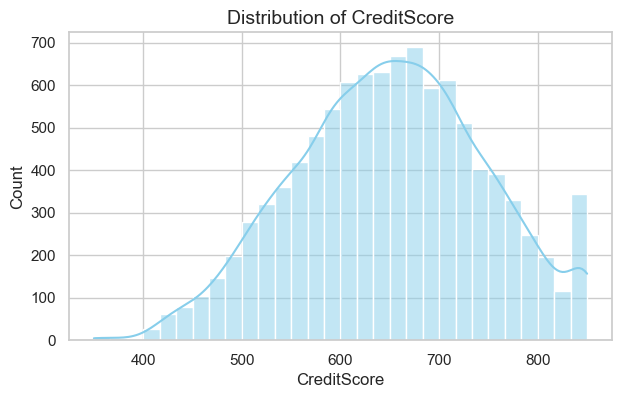

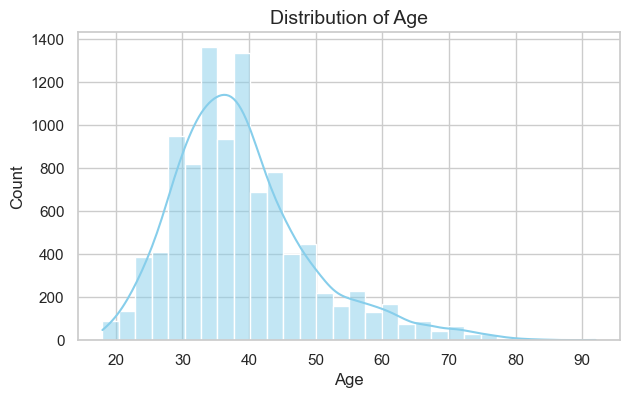

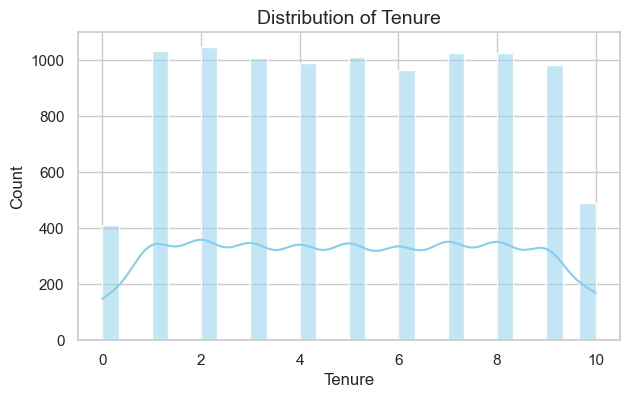

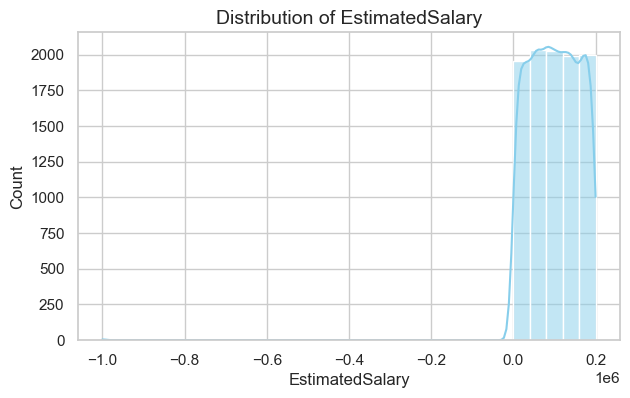

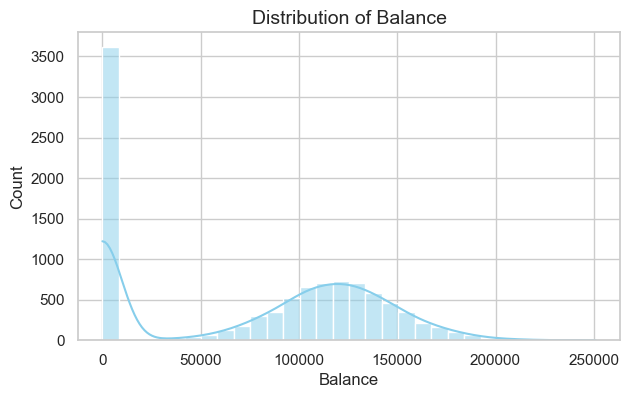

In [349]:
num_cols = ["CreditScore", "Age", "Tenure", "EstimatedSalary", "Balance"]

for col in num_cols:
    plt.figure(figsize=(7,4))
    sb.histplot(comb_df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.show()

RECOMMENDATION  
- Target **single-product customers** with bundled offers.
- Focus retention efforts on **France branch customers**.
- Engage inactive members through personalised outreach.
- Implement loyalty rewards for **middle-aged customers**.
- Inactive members with high balances are a retention opportunity.
